In [1]:
import numpy as np

# one-hot encoding

In [2]:
samples=['The cat sat on the mat.','The dog ate my homework.']
token_index={}

In [3]:
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1  # word as key, index as value, start from 1 instead from 0

In [4]:
token_index

{'The': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'the': 5,
 'mat.': 6,
 'dog': 7,
 'ate': 8,
 'my': 9,
 'homework.': 10}

In [5]:
token_index['ate']

8

In [6]:
max_length = 10 # only read 10 words in each sample 
results = np.zeros(shape=(len(samples), max_length, max(token_index.values())+1)) # 

In [7]:
results.shape

(2, 10, 11)

In [8]:
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]: # only read first 10 words in each sample
        index=token_index.get(word)
        results[i, j, index] = 1 # mark as 1, if appear in this position

In [9]:
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

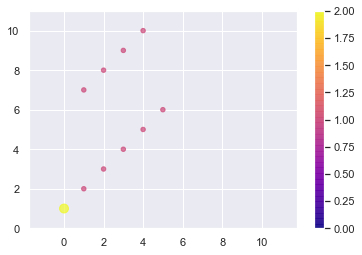

In [12]:
x=np.arange(10)
y=np.arange(0,11)
x, y = np.meshgrid(x, y)
#results[0][0,1]
#plt.contourf(x,y,z=results[0][x,y])
r= results[0]+results[1]
plt.scatter(x,y,s=20*r[x,y]**2, c=r[x,y], cmap='plasma', alpha=0.7)
#plt.scatter(x,y,s=results[1][x,y],cmap='viridis', alpha=0.3)
ax=plt.gca() 
ax.axis('equal')
plt.xlim(0,10)
plt.ylim(0,11)
plt.colorbar()

In [13]:
import string

In [14]:
string.printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

### Keras built-in one-hot encoding

In [15]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [18]:
tokenizer = Tokenizer(num_words=1000) # num_words: the maximum number of words to keep, based on word frequency.

In [20]:
tokenizer.fit_on_texts(samples) # Updates internal vocabulary based on a list of texts.

In [22]:
tokenizer.word_index

{'the': 1,
 'cat': 2,
 'sat': 3,
 'on': 4,
 'mat': 5,
 'dog': 6,
 'ate': 7,
 'my': 8,
 'homework': 9}

In [24]:
sequences=tokenizer.texts_to_sequences(samples) #Transforms each text in texts to a sequence of integers.
sequences

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [32]:
one_hot_results= tokenizer.texts_to_matrix(samples, mode='binary')
print(one_hot_results[0][:10])

[0. 1. 1. 1. 1. 1. 0. 0. 0. 0.]


In [26]:
one_hot_results_count= tokenizer.texts_to_matrix(samples, mode='count')
one_hot_results_count

array([[0., 2., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [27]:
print(one_hot_results_count[0][:10])

[0. 2. 1. 1. 1. 1. 0. 0. 0. 0.]


In [3]:
timesteps=100
input_features=32
output_features=64
inputs=np.random.random((timesteps, input_features))

In [4]:
inputs.shape

(100, 32)

In [5]:
state_t=np.zeros((output_features,))

In [6]:
state_t.shape

(64,)

In [7]:
W=np.random.random((output_features, input_features))
U=np.random.random((output_features, output_features))
b=np.random.random((output_features,))

In [8]:
print(W)

[[0.78925312 0.83225641 0.59165042 ... 0.87492466 0.55965291 0.82204601]
 [0.34916952 0.52239971 0.19556718 ... 0.95619772 0.29955488 0.95770622]
 [0.42100457 0.34162977 0.96641425 ... 0.88497431 0.81198443 0.39389296]
 ...
 [0.74704046 0.8448289  0.03310403 ... 0.90602959 0.03976432 0.85780849]
 [0.05390123 0.24688893 0.97221708 ... 0.06558631 0.5876637  0.01688038]
 [0.35648463 0.78288225 0.05774365 ... 0.680147   0.09981427 0.72869581]]


In [9]:
successive_outputs=[]

In [10]:
for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t)+ np.dot(U, state_t) + b) #Compute hyperbolic tangent element-wise
    #print(output_t)
    successive_outputs.append(output_t) #store current state
    state_t = output_t # update the state for next step

In [11]:
import tensorflow as tf

In [12]:
from keras.layers import SimpleRNN

Using TensorFlow backend.


In [14]:
from keras.models import Sequential

In [15]:
model=Sequential()

In [ ]:
model.add